Research Question:
"What factors influence medical insurance charges, and how can insights from the data help optimize costs and improve equity in pricing?"





In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nanditapore/medical-cost-dataset")

print("Path to dataset files:", path)

100%|██████████| 18.9k/18.9k [00:00<00:00, 11.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/nanditapore/medical-cost-dataset/versions/1


In [2]:
# Specify the dataset to download
!kaggle datasets download -d nanditapore/medical-cost-dataset

# Unzip the dataset
!unzip medical-cost-dataset.zip


Dataset URL: https://www.kaggle.com/datasets/nanditapore/medical-cost-dataset
License(s): apache-2.0
  0% 0.00/18.9k [00:00<?, ?B/s]
100% 18.9k/18.9k [00:00<00:00, 16.8MB/s]
Archive:  medical-cost-dataset.zip
  inflating: medical_cost.csv        


In [3]:
import pandas as pd
#install plotly
# https://plotly.com/python/pandas-backend/
!pip install plotly==4.14.3
pd.options.plotting.backend = "plotly"
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gmean

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 58.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [4]:
#read data
medical_cost = pd.read_csv("medical_cost.csv")

In [10]:
# Preview the all data
medical_cost.head()


,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.900,0,yes,southwest,16884.92400
1,2,18,male,33.770,1,no,southeast,1725.55230
2,3,28,male,33.000,3,no,southeast,4449.46200
3,4,33,male,22.705,0,no,northwest,21984.47061
4,5,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# Quick bar plot
medical_cost.sex.value_counts().plot(kind="bar")
medical_cost.smoker.value_counts().plot(kind="bar")

In [ ]:
# Basic information
medical_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [ ]:
# Descriptive statistics
medical_cost.describe(include='all')

,Id,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,NaN,2,NaN,NaN,2,4,NaN
top,NaN,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,NaN,676,NaN,NaN,1064,364,NaN
mean,669.500000,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,386.391641,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,1.000000,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,335.250000,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,669.500000,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,1003.750000,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [ ]:
#Check for missing values
medical_cost.isnull().sum()

,0
Id,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


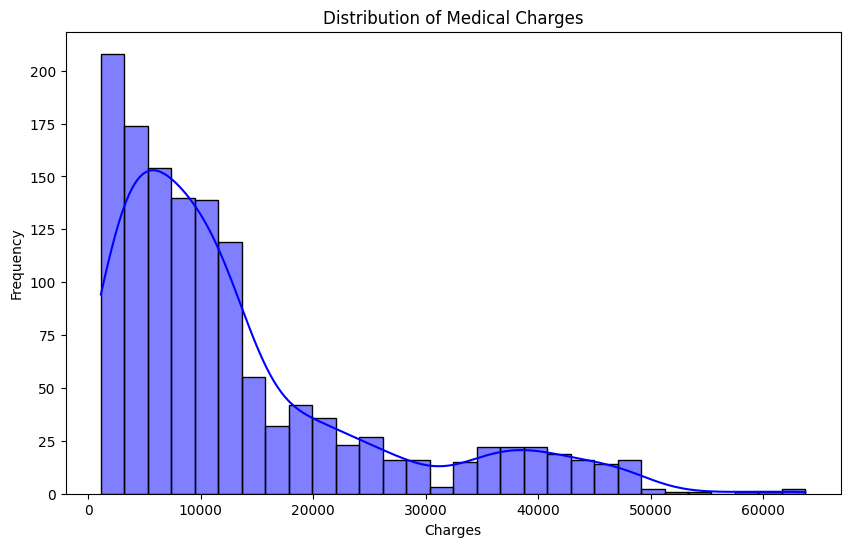

In [ ]:
# Visualize distribution of charges
plt.figure(figsize=(10, 6))
sns.histplot(medical_cost['charges'], kde=True, color="blue", bins=30)
plt.title("Distribution of Medical Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

The charges variable is highly skewed, with a long tail of very high charges.

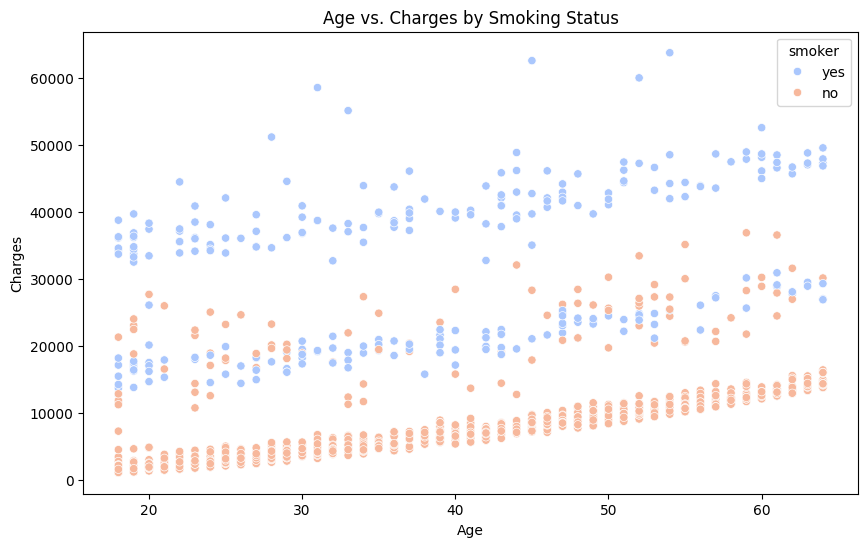

In [ ]:
# Relationship between age and charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=medical_cost, palette="coolwarm")
plt.title("Age vs. Charges by Smoking Status")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

Medical charges increase with age.
Smokers have significantly higher charges compared to non-smokers across all ages.

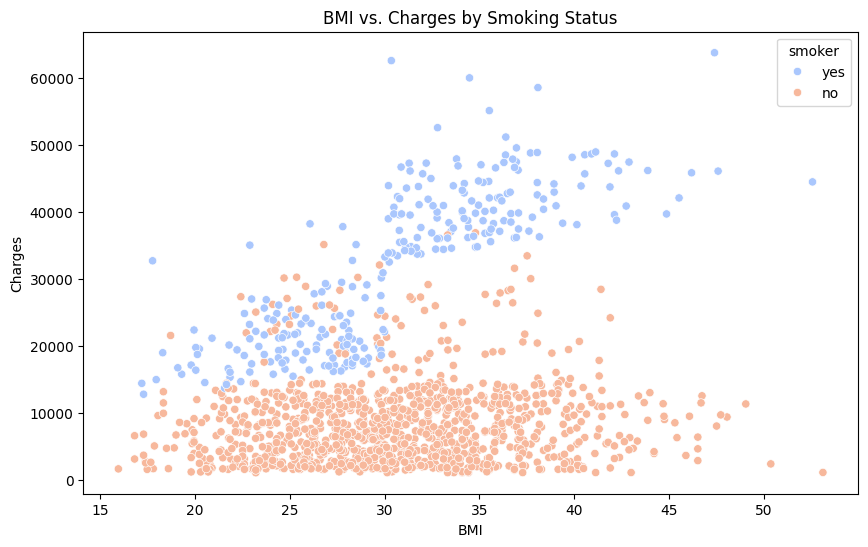

In [ ]:
# Charges by BMI and Smoking Status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=medical_cost, palette="coolwarm")
plt.title("BMI vs. Charges by Smoking Status")
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

Higher BMI correlates with higher medical charges, especially among smokers.

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the dataset
medical_cost.to_csv('/content/drive/My Drive/medical_cost.csv', index=False)

Mounted at /content/drive
